<a href="https://colab.research.google.com/github/waghvaishnav/Model-Evaluation-Fine-Tuning-in-the-Machine-Learning-Toolkit/blob/main/ROC_AUC_Curves_cost_benefit_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost Benefit Analysis using ROC AUC Curves :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x,y= make_classification(n_features=10,
                         n_samples=1000,
                         n_informative=4,
                         n_redundant=6,
                         n_repeated=0,
                         n_classes=2,
                         random_state=42)

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)


# train logistic model :

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       122
           1       0.69      0.66      0.68       128

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



In [ ]:
probability = model.predict_proba(x_test)[:,1]

In [ ]:
# new prediction with changing threshold  : here add the calculated threshold by the closest point.

y_pred = (probability > 0.13740583981828264 ).astype(int)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.14      0.24       122
           1       0.55      0.98      0.70       128

    accuracy                           0.57       250
   macro avg       0.72      0.56      0.47       250
weighted avg       0.72      0.57      0.48       250



As you can see here for class 1, the recall increased to 82%. Which is good but now by business manager is saying they need 90% recall. We will find probability thresold associated with 90% recall using ROC curve.

# calculate tpr,fpr,threshold

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,probability)
fpr[:5],tpr[:5],threshold[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625]),
 array([       inf, 0.97928246, 0.80890214, 0.80840719, 0.80207033]))

In [ ]:
desired_recall = 0.9
closest_index = np.argmin(abs(fpr-desired_recall))
fpr[closest_index],tpr[closest_index],threshold[closest_index]

(np.float64(0.8688524590163934),
 np.float64(0.984375),
 np.float64(0.13740583981828264))

What this is saying is you need to configure your probability threshold to be 0.26 for a desired_recall value. Also you will have 0.7 false positive rate which is pretty high. Do not worry because later we will try a better model (XGBoost)

# calculate auc

In [ ]:
from sklearn.metrics import auc
area = auc(fpr,tpr)
area

np.float64(0.764856557377049)

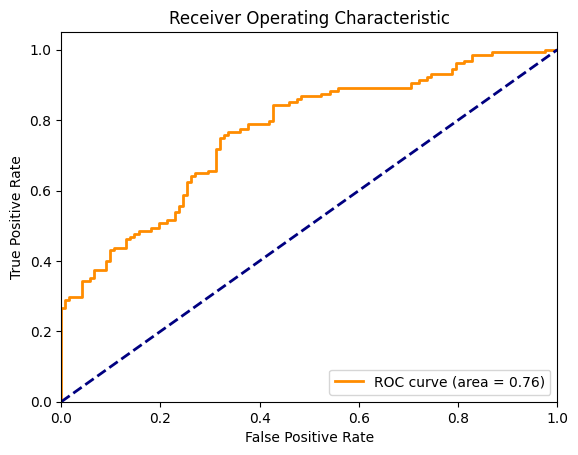

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# train xgboost model :

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       0.93      0.89      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [ ]:
probability_xgb = xgb.predict_proba(x_test)[:,1]
fpr_xgb,tpr_xgb,threshold_xgb = roc_curve(y_test,probability_xgb)
fpr_xgb[:5],tpr_xgb[:5],threshold_xgb[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.09375  , 0.09375  , 0.203125 ]),
 array([       inf, 0.99996376, 0.99989676, 0.999892  , 0.9997204 ],
       dtype=float32))

In [ ]:
# calculate auc :
area_xgb = auc(fpr_xgb,tpr_xgb)
area_xgb

np.float64(0.946016905737705)

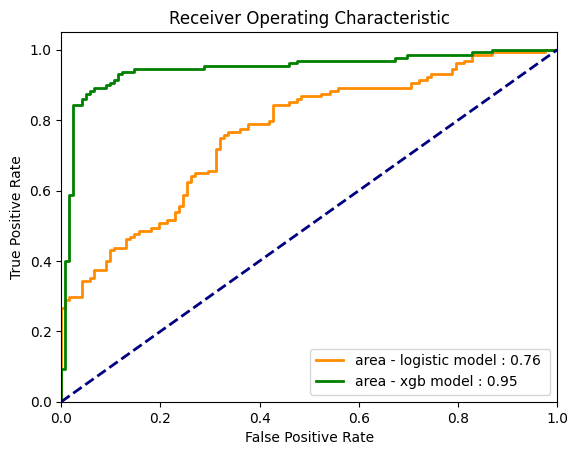

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"area - logistic model : {area:.2f} ")
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f"area - xgb model : {area_xgb:.2f}")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

here above graph the xgboost model shows high performance compared to the logistic model because they covers more area.

In [ ]:
desired_recall = 0.92
closests_index = np.argmin(abs(tpr_xgb - desired_recall))
fpr_xgb[closests_index],tpr_xgb[closests_index],threshold_xgb[closests_index]

(np.float64(0.10655737704918032),
 np.float64(0.9140625),
 np.float32(0.30599597))

Threshold associated with 92% recall is 0.3, we will incorporate this in our inference code and deploy the model. Note that with this we will get a false positive rate of around 10% (0.106) describes how much threshold required for 92 % accuracy.